In [5]:
#install package
import pandas as pd

In [7]:
#impor data dari excel
dataset=pd.read_excel("E:/Bahan Statistika/Data jumlah perkebunan besar 2009-2017.xlsx")

In [8]:
dataset

,Karet Kering,Minyak Sawit,Biji Sawit
0,50.00,1427.10,208.40
1,45.50,1188.00,186.50
2,40.10,1346.70,217.90
3,38.80,1193.50,270.90
4,47.20,1239.50,291.40
...,...,...,...
103,34.32,1897.57,379.51
104,80.08,1886.92,377.38
105,78.15,1840.43,368.09
106,69.33,1843.96,368.79


In [9]:
x=dataset["Karet Kering"]
y=dataset["Minyak Sawit"]
z=dataset["Biji Sawit"]

In [10]:
#statistika deskriptif
dataset.describe()

,Karet Kering,Minyak Sawit,Biji Sawit
count,108.000000,108.000000,108.000000
mean,48.794815,1468.461019,305.941296
std,11.937596,266.044679,50.403974
min,31.000000,867.300000,186.500000
25%,41.032500,1276.407500,265.297500
50%,45.835000,1486.030000,305.410000
75%,52.255000,1661.627500,345.580000
max,85.090000,2001.680000,400.340000


In [14]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [15]:
#install package
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [21]:
#membuat data training dan data testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

In [24]:
x_train.shape, y_train.shape
x_test.shape, y_test.shape

((44,), (44,))

In [18]:
x_train

79     31.00
42     51.14
41     48.44
4      47.20
15     40.20
       ...  
104    80.08
67     46.00
64     51.30
47     59.28
44     42.99
Name: Karet Kering, Length: 64, dtype: float64

In [19]:
y_train

79     1975.09
42     1431.03
41     1535.39
4      1239.50
15     1180.80
        ...   
104    1886.92
67     1829.98
64     1635.14
47     1153.89
44     1063.01
Name: Minyak Sawit, Length: 64, dtype: float64

In [27]:
# Uji Stasioneritas dalam mean menggunakan ADF
# Mengimpor library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [33]:
# Menambahkan kolom month 
dataset["month"] = pd.date_range(start="2012-01-01", end="2020-12-01", freq="MS")

In [34]:
# Mengubah kolom month menjadi format datetime
dataset["month"] = pd.to_datetime(dataset["month"], format="%Y-%m")
dataset.set_index("month", inplace=True)

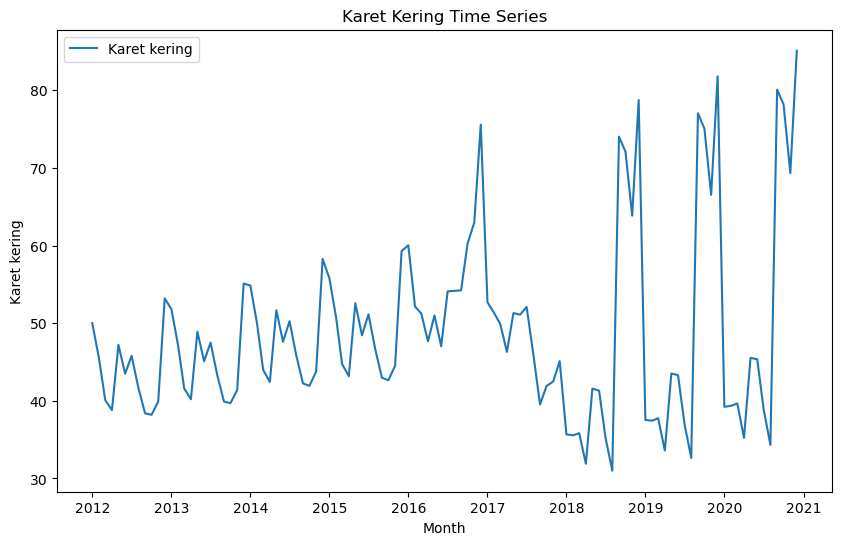

In [36]:
# Membuat plot rangkaian waktu penjualan karet
plt.figure(figsize=(10, 6))
plt.plot(dataset["Karet Kering"], label="Karet kering")
plt.xlabel("Month")
plt.ylabel("Karet kering")
plt.title("Karet Kering Time Series")
plt.legend()
plt.show()

In [48]:
from scipy.stats import boxcox
import seaborn as sns

In [49]:
# Melakukan transformasi box cox 
tdata, lam = boxcox(dataset["Karet Kering"])
print("Lambda:", lam)

Lambda: -1.2238954935229815


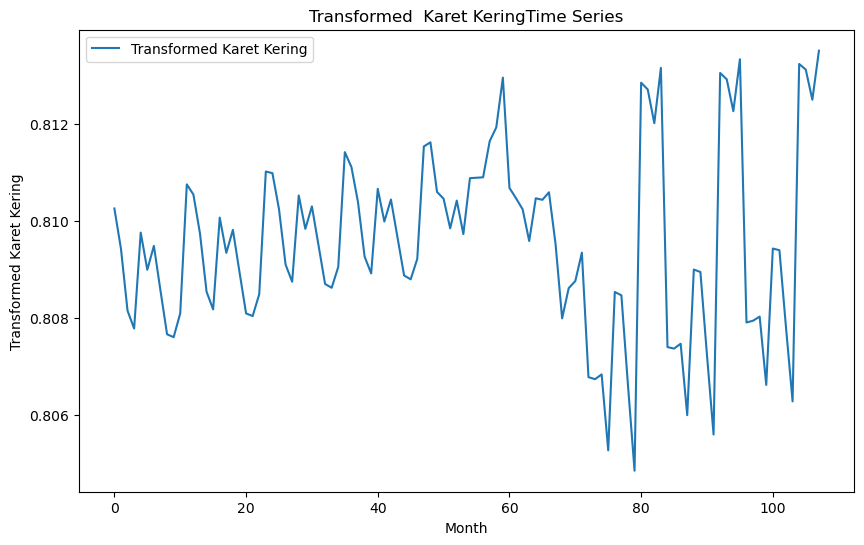

In [84]:
# Membuat plot rangkaian waktu yang sudah ditransformasi
plt.figure(figsize=(10, 6))
plt.plot(tdata, label="Transformed Karet Kering")
plt.xlabel("Month")
plt.ylabel("Transformed Karet Kering")
plt.title("Transformed  Karet KeringTime Series")
plt.legend()
plt.show()

In [51]:
# Melakukan transformasi box cox data hasil transformasi
tdata2, lam = boxcox(tdata)
print("Lambda:", lam)

Lambda: -3.9939902383371284


In [37]:
# Melakukan uji ADF 
result = adfuller(dataset["Karet Kering"])
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:")
for key, value in result[4].items():
    print("\t", key, ":", value)

ADF Statistic: -2.508148001780206
p-value: 0.11350439408561047
Critical Values:
	 1% : -3.5011373281819504
	 5% : -2.8924800524857854
	 10% : -2.5832749307479226


In [38]:
# Menentukan apakah rangkaian waktu stasioner atau tidak berdasarkan p-value dan nilai kritis
if result[1] > 0.05:
    print("Rangkaian waktu memiliki akar unit, artinya tidak stasioner.")
else:
    print("Rangkaian waktu tidak memiliki akar unit, artinya stasioner.")

Rangkaian waktu memiliki akar unit, artinya tidak stasioner.


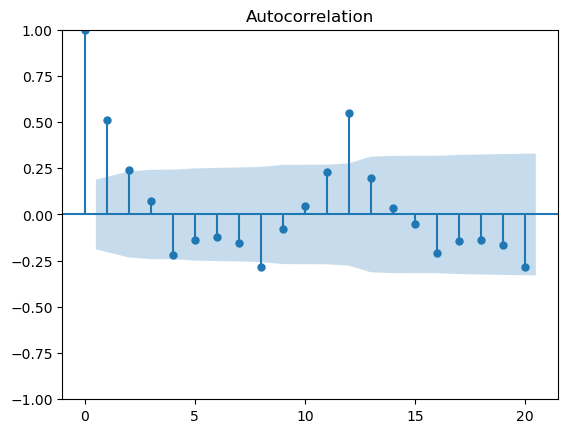

In [46]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Menghitung dan memplot ACF 
plot_acf(dataset["Karet Kering"], lags=20)
plt.show()

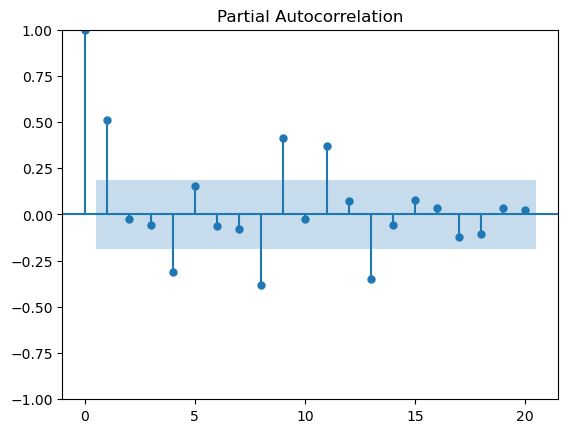

In [47]:
# Menghitung dan memplot PACF 
plot_pacf(dataset["Karet Kering"], lags=20)
plt.show()

In [41]:
#package untuk arima
from statsmodels.tsa.arima.model import ARIMA

In [77]:
# Membuat model ARIMA dengan orde (p, d, q) = (1, 1, 1)
modelts = ARIMA(dataset["Karet Kering"], order=(1, 1, 1))
modelts_fit = modelts.fit()

D:\Program Statistika Rafif\anaconda\New folder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Program Statistika Rafif\anaconda\New folder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Program Statistika Rafif\anaconda\New folder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [78]:
# Mencetak ringkasan model ARIMA
print(modelts_fit.summary())

                               SARIMAX Results                                
Dep. Variable:           Karet Kering   No. Observations:                  108
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -400.701
Date:                Tue, 10 Oct 2023   AIC                            807.403
Time:                        10:07:23   BIC                            815.421
Sample:                    01-01-2012   HQIC                           810.653
                         - 12-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5635      0.156      3.616      0.000       0.258       0.869
ma.L1         -0.9813      0.109     -8.995      0.000      -1.195      -0.767
sigma2       102.7856      9.193     11.181      0.0

In [82]:
# Membuat prediksi untuk 12 bulan ke depan dengan interval kepercayaan 95%
predts = modelts_fit.get_forecast(steps=12)
predts_ci = predts.conf_int(alpha=0.05)
predts_ci

,lower Karet Kering,upper Karet Kering
2021-01-01,50.317803,90.070772
2021-02-01,38.795669,84.805956
2021-03-01,33.051142,81.091328
2021-04-01,30.008946,78.803455
2021-05-01,28.348626,77.460373
2021-06-01,27.425398,76.691237
2021-07-01,26.904669,76.258347
2021-08-01,26.606714,76.018955
2021-09-01,26.433018,75.889865
2021-10-01,26.328939,75.823330


In [53]:
#MODEL REGRESI TIME SERIES
#uji autokorelasi residual
from statsmodels.stats.stattools import durbin_watson
#uji normalitas residual
import statsmodels.api as sm
from scipy.stats import shapiro
#uji homoskedastisitas
from statsmodels.stats.diagnostic import het_breuschpagan

In [55]:
# Membuat model regresi linier berganda dengan variabel sales sebagai variabel dependen dan variabel lain sebagai variabel independen
X = dataset.drop("Karet Kering", axis=1)
y = dataset["Karet Kering"]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Mencetak ringkasan model regresi
print(model.summary())

# Melakukan uji Durbin-Watson pada residual model regresi
dw = durbin_watson(model.resid)
print("Durbin-Watson statistic:", dw)

                            OLS Regression Results                            
Dep. Variable:           Karet Kering   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     4.133
Date:                Tue, 10 Oct 2023   Prob (F-statistic):             0.0187
Time:                        08:50:51   Log-Likelihood:                -416.46
No. Observations:                 108   AIC:                             838.9
Df Residuals:                     105   BIC:                             847.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           32.8954      7.070      4.653   

In [56]:
# Melakukan uji Shapiro-Wilk pada residual model regresi untuk normalitas
sw = shapiro(model.resid)
print("Shapiro-Wilk statistic:", sw[0])
print("p-value:", sw[1])

Shapiro-Wilk statistic: 0.9556535482406616
p-value: 0.0012038385029882193


In [57]:
# Melakukan uji Breusch-Pagan pada residual model regresi
bp = het_breuschpagan(model.resid, model.model.exog)
print("Lagrange multiplier statistic:", bp[0])
print("p-value:", bp[1])
print("F-statistic:", bp[2])
print("p-value:", bp[3])

Lagrange multiplier statistic: 30.32685124038421
p-value: 2.597813243034084e-07
F-statistic: 20.49819938480433
p-value: 3.051235121420713e-08


In [70]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Karet Kering   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     4.133
Date:                Tue, 10 Oct 2023   Prob (F-statistic):             0.0187
Time:                        09:48:26   Log-Likelihood:                -416.46
No. Observations:                 108   AIC:                             838.9
Df Residuals:                     105   BIC:                             847.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           32.8954      7.070      4.653      0.000      18.878      46.913
Minyak Sawit     0.0144      0.007      2.214      0.029       0.002       0.027
Biji Sawit      -0.0173      0.034     -0.504      0.616      -0.086       0.051
==============================================================================
Omnibus:                        9.466   Durbin-Watson:                   0.982
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.392
Skew:                           0.694   Prob(JB):                      0.00913
Kurtosis:                       3.401   Cond. No.                     9.65e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [83]:
# Membuat prediksi untuk 12 bulan ke depan dengan interval kepercayaan 95%
pred = model_fit.get_forecast(steps=12)
pred_ci = pred.conf_int(alpha=0.05)
pred_ci

,lower Karet Kering,upper Karet Kering
2021-01-01,50.317803,90.070772
2021-02-01,38.795669,84.805956
2021-03-01,33.051142,81.091328
2021-04-01,30.008946,78.803455
2021-05-01,28.348626,77.460373
2021-06-01,27.425398,76.691237
2021-07-01,26.904669,76.258347
2021-08-01,26.606714,76.018955
2021-09-01,26.433018,75.889865
2021-10-01,26.328939,75.823330


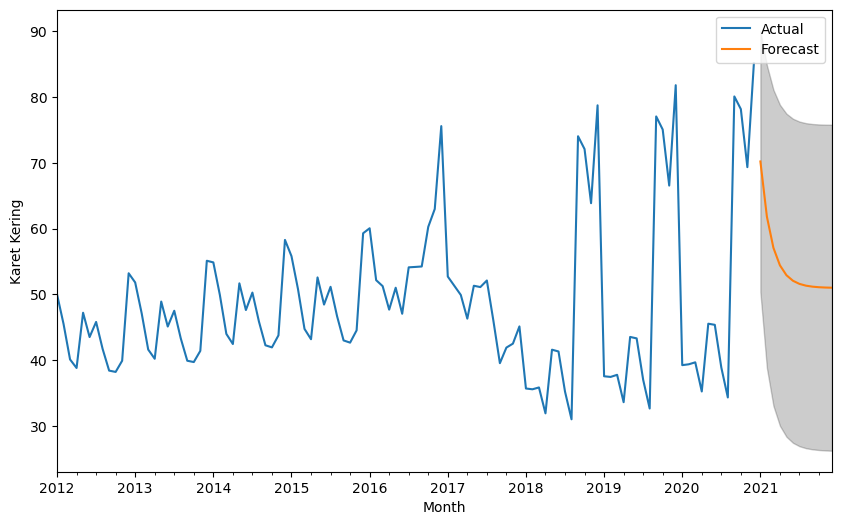

In [75]:
# Membuat plot data aktual dan data prediksi 
ax = dataset["Karet Kering"].plot(label="Actual", figsize=(10, 6))
pred.predicted_mean.plot(ax=ax, label="Forecast")
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color="k", alpha=0.2)
ax.set_xlabel("Month")
ax.set_ylabel("Karet Kering")
plt.legend()
plt.show()